In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# QQ Plot Each Voltage STD Based

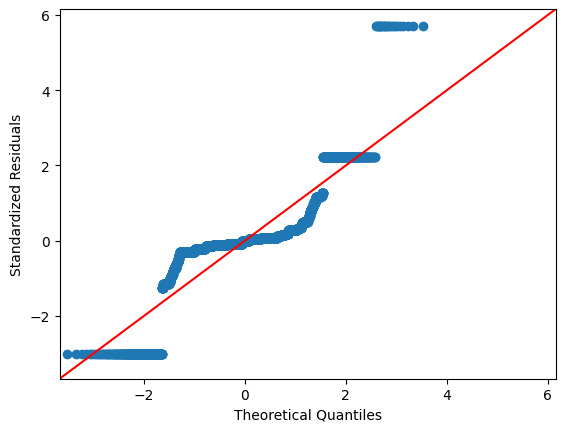

In [16]:
df_each_std = pd.read_csv('../docs 2nd Approach/remove_outlier_each_std.csv')
df_each_std['z-score'] = (df_each_std['value'] - df_each_std['value'].mean()) / df_each_std['value'].std()
res = stat()
res.tukey_hsd(df=df_each_std, res_var='value', xfac_var='voltage', anova_model='value ~ C(voltage)')
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.savefig('../docs 2nd Approach/img/QQ Plot Remove Outlier based on each sample STD.png')
plt.show()

In [17]:
OLS_each_std = ols('value ~ voltage', data = df_each_std).fit()
ANOVA_each_std = sm.stats.anova_lm(OLS_each_std)
ANOVA_each_std

,df,sum_sq,mean_sq,F,PR(>F)
voltage,8.0,10070.680453,1258.835057,957.504734,0.0
Residual,4689.0,6164.645845,1.314704,NaN,NaN


# QQ Plot Based Whole Population

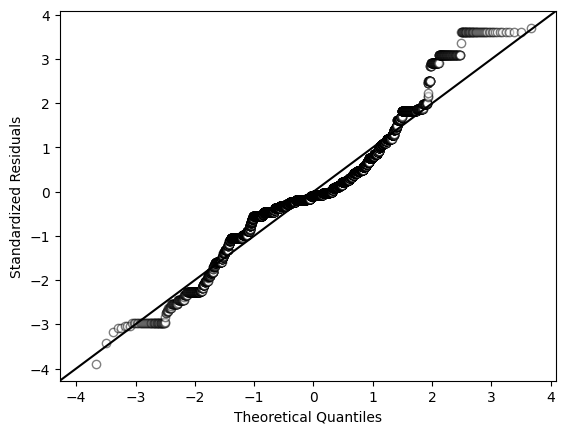

In [51]:
df_whole_std = pd.read_csv('../docs 2nd Approach/remove_outlier_whole_std.csv')
res = stat()
res.tukey_hsd(df=df_whole_std, res_var='value', xfac_var='voltage', anova_model='value ~ C(voltage)')
pp = sm.ProbPlot(res.anova_std_residuals, fit=True)
qq = pp.qqplot(marker='o', markerfacecolor='w', markeredgecolor='k', alpha=0.5)
sm.qqline(qq.axes[0], line='45', fmt='k--')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.savefig('../docs 2nd Approach/img/QQ Plot Remove Outlier based on Whole STD.png')
plt.show()

In [19]:
OLS_whole_std = ols('value ~ voltage', data = df_whole_std).fit()
ANOVA_whole_std = sm.stats.anova_lm(OLS_whole_std) 
ANOVA_whole_std  

,df,sum_sq,mean_sq,F,PR(>F)
voltage,8.0,960.785070,120.098134,129.3575,3.164132e-205
Residual,8258.0,7666.895137,0.928420,NaN,NaN


# QQ Plot Chauvenet

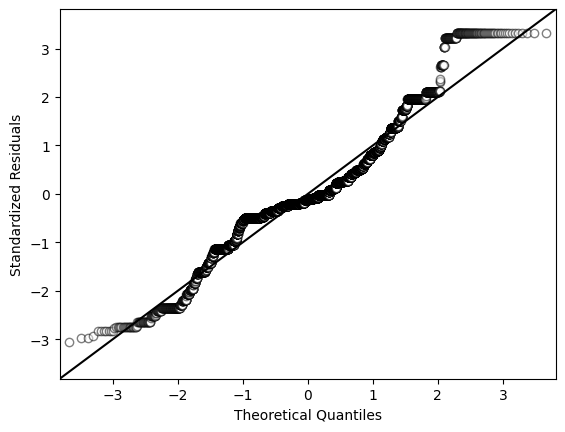

In [4]:
df_chauvenet = pd.read_csv('../docs 2nd Approach/remove_outlier_chauvenet.csv')
df_chauvenet['z-score'] = (df_chauvenet['value'] - df_chauvenet['value'].mean()) / df_chauvenet['value'].std()
res = stat()
res.tukey_hsd(df=df_chauvenet, res_var='value', xfac_var='voltage', anova_model='value ~ C(voltage)')
pp = sm.ProbPlot(res.anova_std_residuals, fit=True)
qq = pp.qqplot(marker='o', markerfacecolor='w', markeredgecolor='k', alpha=0.5)
sm.qqline(qq.axes[0], line='45', fmt='k--')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.savefig('../docs 2nd Approach/img/QQ Plot Remove Outlier based on Chauvenet.png')
plt.show()

In [1]:
OLS_chauvenet = ols('value ~ voltage', data = df_chauvenet).fit()
ANOVA_chauvenet = sm.stats.anova_lm(OLS_chauvenet)
ANOVA_chauvenet

NameError: name 'ols' is not defined

In [6]:
df_chauvenet = df_chauvenet.sort_values(by=['value'])

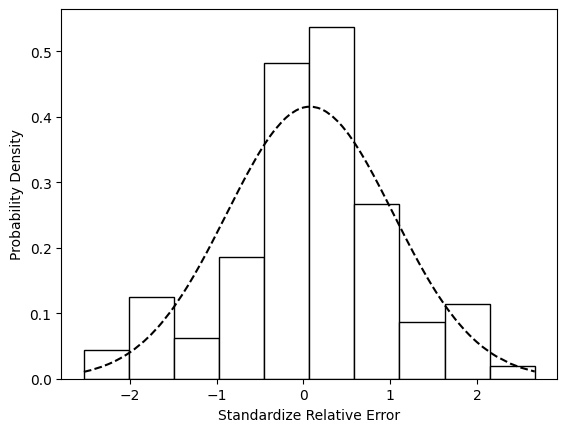

In [13]:

plt.plot(df_chauvenet['value'], stats.norm.pdf(df_chauvenet['value'], df_chauvenet['value'].mean(), df_chauvenet['value'].std()), color='k', linestyle='--')
plt.hist(df_chauvenet['value'], density=True, edgecolor='k', color='w', bins=10)
plt.xlabel('Standardize Relative Error')
plt.ylabel('Probability Density')
plt.savefig('../docs 2nd Approach/img/distribution_normal_remove_chauvenet.png')